In [127]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import mlutils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
%matplotlib inline
reload(mlutils)

<module 'mlutils' from 'mlutils.py'>

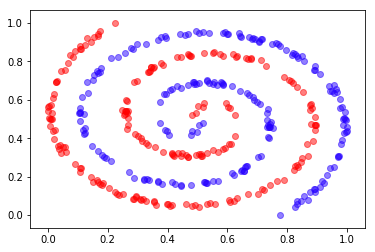

In [199]:
reload(mlutils)
X,y = mlutils.twospirals(200)
mlutils.plot_2Ddata(X,y)

se convierte la salida esperada a variable categórica (**onehot encoding**)

In [171]:
yc = tf.keras.utils.to_categorical(y)

### obserca cómo se pueden añadir distintos tipos de transformaciones a X

**Cuadráticas**

In [176]:
Xt = np.hstack((X,X**2))
print Xt.shape
print X[:2]
print Xt[:2]

(400, 4)
[[0.26557787 0.57253131]
 [0.06294846 0.32648379]]
[[0.26557787 0.57253131 0.0705316  0.3277921 ]
 [0.06294846 0.32648379 0.00396251 0.10659167]]


**sin, cos**

In [173]:
Xt = np.hstack((X,np.sin(X), np.cos(X)))
print Xt.shape
print X[:2]
print Xt[:2]

(400, 6)
[[0.26557787 0.57253131]
 [0.06294846 0.32648379]]
[[0.26557787 0.57253131 0.26246692 0.54176143 0.96494099 0.8405323 ]
 [0.06294846 0.32648379 0.06290689 0.32071455 0.9980194  0.9471759 ]]


**recombinación de columnas**

In [174]:
Xt = np.hstack((X,X[:,[0]]*X[:,[1]]))
print Xt.shape
print X[:2]
print Xt[:2]

(400, 3)
[[0.26557787 0.57253131]
 [0.06294846 0.32648379]]
[[0.26557787 0.57253131 0.15205165]
 [0.06294846 0.32648379 0.02055165]]


## Creamos el modelo

In [234]:
def get_model(input_dim=2):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(Dense(6, activation='tanh', input_dim=input_dim))
    model.add(Dense(3, activation='tanh'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.reset_states()
    return model


**Observa como creamos una función para transformar los datos**

In [235]:
def transform_X(X):
    return np.hstack((X,X**2))

model = get_model(transform_X(X).shape[1])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8         
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


** haz el entrenamiento **

- prueba con distinto tamaño de batch
- quizá tengas que ir hasta 2000 o 3000 epochs o quizá más
- monitorea la evolución del desempeño
- puedes parar el entrenamiento (kernel->interrupt) y observar la clasificación
- si vuelves a ejecutar la celda con `fit` el entrenamiento seguirá desde donde estaba
- si vuelves a ejecutar la celda con `get_model` el entrenamiento se reinicializa

In [251]:
model.fit(transform_X(X), yc, epochs=4000, batch_size=16)

Epoch 1/4000
400/400 [==============================] - 0s 239us/step - loss: 0.0947 - acc: 0.9650
Epoch 2/4000
400/400 [==============================] - 0s 228us/step - loss: 0.0940 - acc: 0.9625
Epoch 3/4000
400/400 [==============================] - 0s 217us/step - loss: 0.0938 - acc: 0.9650
Epoch 4/4000
400/400 [==============================] - 0s 225us/step - loss: 0.0939 - acc: 0.9650
Epoch 5/4000
400/400 [==============================] - 0s 291us/step - loss: 0.0941 - acc: 0.9650
Epoch 6/4000
400/400 [==============================] - 0s 277us/step - loss: 0.0936 - acc: 0.9650
Epoch 7/4000
400/400 [==============================] - 0s 256us/step - loss: 0.0942 - acc: 0.9625
Epoch 8/4000
400/400 [==============================] - 0s 243us/step - loss: 0.0938 - acc: 0.9650
Epoch 9/4000
400/400 [==============================] - 0s 245us/step - loss: 0.0940 - acc: 0.9650
Epoch 10/4000
400/400 [==============================] - 0s 246us/step - loss: 0.0938 - acc: 0.9650
Epoch 11/

400/400 [==============================] - 0s 322us/step - loss: 0.0921 - acc: 0.9675
Epoch 83/4000
400/400 [==============================] - 0s 242us/step - loss: 0.0921 - acc: 0.9675
Epoch 84/4000
400/400 [==============================] - 0s 243us/step - loss: 0.0916 - acc: 0.9675
Epoch 85/4000
400/400 [==============================] - 0s 257us/step - loss: 0.0919 - acc: 0.9675
Epoch 86/4000
400/400 [==============================] - 0s 256us/step - loss: 0.0931 - acc: 0.9675
Epoch 87/4000
400/400 [==============================] - 0s 209us/step - loss: 0.0937 - acc: 0.9650
Epoch 88/4000
400/400 [==============================] - 0s 208us/step - loss: 0.0920 - acc: 0.9675
Epoch 89/4000
400/400 [==============================] - 0s 186us/step - loss: 0.0918 - acc: 0.9675
Epoch 90/4000
400/400 [==============================] - 0s 189us/step - loss: 0.0919 - acc: 0.9675
Epoch 91/4000
400/400 [==============================] - 0s 218us/step - loss: 0.0918 - acc: 0.9675
Epoch 92/4000


400/400 [==============================] - 0s 185us/step - loss: 0.0899 - acc: 0.9675
Epoch 164/4000
400/400 [==============================] - 0s 252us/step - loss: 0.0896 - acc: 0.9675
Epoch 165/4000
400/400 [==============================] - 0s 308us/step - loss: 0.0901 - acc: 0.9675
Epoch 166/4000
400/400 [==============================] - 0s 272us/step - loss: 0.0899 - acc: 0.9700
Epoch 167/4000
400/400 [==============================] - 0s 223us/step - loss: 0.0913 - acc: 0.9675
Epoch 168/4000
400/400 [==============================] - 0s 252us/step - loss: 0.0904 - acc: 0.9700
Epoch 169/4000
400/400 [==============================] - 0s 290us/step - loss: 0.0899 - acc: 0.9675
Epoch 170/4000
400/400 [==============================] - 0s 267us/step - loss: 0.0903 - acc: 0.9700
Epoch 171/4000
400/400 [==============================] - 0s 244us/step - loss: 0.0896 - acc: 0.9700
Epoch 172/4000
400/400 [==============================] - 0s 278us/step - loss: 0.0896 - acc: 0.9675
Epoch

400/400 [==============================] - 0s 247us/step - loss: 0.0879 - acc: 0.9700
Epoch 245/4000
400/400 [==============================] - 0s 276us/step - loss: 0.0884 - acc: 0.9675
Epoch 246/4000
400/400 [==============================] - 0s 244us/step - loss: 0.0888 - acc: 0.9700
Epoch 247/4000
400/400 [==============================] - 0s 290us/step - loss: 0.0896 - acc: 0.9675
Epoch 248/4000
400/400 [==============================] - 0s 271us/step - loss: 0.0882 - acc: 0.9700
Epoch 249/4000
400/400 [==============================] - 0s 335us/step - loss: 0.0882 - acc: 0.9675
Epoch 250/4000
400/400 [==============================] - 0s 280us/step - loss: 0.0880 - acc: 0.9700
Epoch 251/4000
400/400 [==============================] - 0s 234us/step - loss: 0.0891 - acc: 0.9675
Epoch 252/4000
400/400 [==============================] - 0s 282us/step - loss: 0.0873 - acc: 0.9700
Epoch 253/4000
400/400 [==============================] - 0s 292us/step - loss: 0.0877 - acc: 0.9675
Epoch

400/400 [==============================] - 0s 334us/step - loss: 0.0892 - acc: 0.9700
Epoch 326/4000
400/400 [==============================] - 0s 323us/step - loss: 0.0901 - acc: 0.9650
Epoch 327/4000
400/400 [==============================] - 0s 367us/step - loss: 0.0896 - acc: 0.9700
Epoch 328/4000
400/400 [==============================] - 0s 309us/step - loss: 0.0860 - acc: 0.9700
Epoch 329/4000
400/400 [==============================] - 0s 297us/step - loss: 0.0861 - acc: 0.9700
Epoch 330/4000
400/400 [==============================] - 0s 312us/step - loss: 0.0859 - acc: 0.9700
Epoch 331/4000
400/400 [==============================] - 0s 341us/step - loss: 0.0859 - acc: 0.9700
Epoch 332/4000
400/400 [==============================] - 0s 386us/step - loss: 0.0859 - acc: 0.9700
Epoch 333/4000
400/400 [==============================] - 0s 344us/step - loss: 0.0863 - acc: 0.9700
Epoch 334/4000
400/400 [==============================] - 0s 380us/step - loss: 0.0862 - acc: 0.9675
Epoch

Epoch 406/4000
400/400 [==============================] - 0s 251us/step - loss: 0.0844 - acc: 0.9725
Epoch 407/4000
400/400 [==============================] - 0s 272us/step - loss: 0.0847 - acc: 0.9725
Epoch 408/4000
400/400 [==============================] - 0s 307us/step - loss: 0.0847 - acc: 0.9725
Epoch 409/4000
400/400 [==============================] - 0s 269us/step - loss: 0.0849 - acc: 0.9725
Epoch 410/4000
400/400 [==============================] - 0s 212us/step - loss: 0.0840 - acc: 0.9725
Epoch 411/4000
400/400 [==============================] - 0s 214us/step - loss: 0.0845 - acc: 0.9725
Epoch 412/4000
400/400 [==============================] - 0s 213us/step - loss: 0.0852 - acc: 0.9725
Epoch 413/4000
400/400 [==============================] - 0s 221us/step - loss: 0.0857 - acc: 0.9750
Epoch 414/4000
400/400 [==============================] - 0s 205us/step - loss: 0.0848 - acc: 0.9725
Epoch 415/4000
400/400 [==============================] - 0s 219us/step - loss: 0.0843 - ac

400/400 [==============================] - 0s 186us/step - loss: 0.0829 - acc: 0.9750
Epoch 486/4000
400/400 [==============================] - 0s 184us/step - loss: 0.0836 - acc: 0.9750
Epoch 487/4000
400/400 [==============================] - 0s 185us/step - loss: 0.0839 - acc: 0.9725
Epoch 488/4000
400/400 [==============================] - 0s 180us/step - loss: 0.0837 - acc: 0.9750
Epoch 489/4000
400/400 [==============================] - 0s 180us/step - loss: 0.0834 - acc: 0.9750
Epoch 490/4000
400/400 [==============================] - 0s 177us/step - loss: 0.0828 - acc: 0.9750
Epoch 491/4000
400/400 [==============================] - 0s 181us/step - loss: 0.0827 - acc: 0.9750
Epoch 492/4000
400/400 [==============================] - 0s 214us/step - loss: 0.0825 - acc: 0.9750
Epoch 493/4000
400/400 [==============================] - 0s 304us/step - loss: 0.0826 - acc: 0.9750
Epoch 494/4000
400/400 [==============================] - 0s 323us/step - loss: 0.0825 - acc: 0.9750
Epoch

400/400 [==============================] - 0s 244us/step - loss: 0.0816 - acc: 0.9750
Epoch 566/4000
400/400 [==============================] - 0s 217us/step - loss: 0.0817 - acc: 0.9750
Epoch 567/4000
400/400 [==============================] - 0s 249us/step - loss: 0.0817 - acc: 0.9750
Epoch 568/4000
400/400 [==============================] - 0s 292us/step - loss: 0.0814 - acc: 0.9750
Epoch 569/4000
400/400 [==============================] - 0s 288us/step - loss: 0.0813 - acc: 0.9750
Epoch 570/4000
400/400 [==============================] - 0s 256us/step - loss: 0.0810 - acc: 0.9750
Epoch 571/4000
400/400 [==============================] - 0s 269us/step - loss: 0.0816 - acc: 0.9750
Epoch 572/4000
400/400 [==============================] - 0s 182us/step - loss: 0.0814 - acc: 0.9750
Epoch 573/4000
400/400 [==============================] - 0s 178us/step - loss: 0.0819 - acc: 0.9750
Epoch 574/4000
400/400 [==============================] - 0s 221us/step - loss: 0.0813 - acc: 0.9750
Epoch

400/400 [==============================] - 0s 245us/step - loss: 0.0805 - acc: 0.9750
Epoch 646/4000
400/400 [==============================] - 0s 228us/step - loss: 0.0801 - acc: 0.9750
Epoch 647/4000
400/400 [==============================] - 0s 255us/step - loss: 0.0801 - acc: 0.9750
Epoch 648/4000
400/400 [==============================] - 0s 277us/step - loss: 0.0798 - acc: 0.9750
Epoch 649/4000
400/400 [==============================] - 0s 332us/step - loss: 0.0802 - acc: 0.9750
Epoch 650/4000
400/400 [==============================] - 0s 292us/step - loss: 0.0799 - acc: 0.9750
Epoch 651/4000
400/400 [==============================] - 0s 287us/step - loss: 0.0798 - acc: 0.9750
Epoch 652/4000
400/400 [==============================] - 0s 192us/step - loss: 0.0799 - acc: 0.9750
Epoch 653/4000
400/400 [==============================] - 0s 230us/step - loss: 0.0800 - acc: 0.9750
Epoch 654/4000
400/400 [==============================] - 0s 346us/step - loss: 0.0801 - acc: 0.9750
Epoch

Epoch 726/4000
400/400 [==============================] - 0s 179us/step - loss: 0.0788 - acc: 0.9750
Epoch 727/4000
400/400 [==============================] - 0s 187us/step - loss: 0.0791 - acc: 0.9750
Epoch 728/4000
400/400 [==============================] - 0s 177us/step - loss: 0.0788 - acc: 0.9750
Epoch 729/4000
400/400 [==============================] - 0s 180us/step - loss: 0.0788 - acc: 0.9750
Epoch 730/4000
400/400 [==============================] - 0s 180us/step - loss: 0.0784 - acc: 0.9750
Epoch 731/4000
400/400 [==============================] - 0s 181us/step - loss: 0.0787 - acc: 0.9750
Epoch 732/4000
400/400 [==============================] - 0s 181us/step - loss: 0.0795 - acc: 0.9750
Epoch 733/4000
400/400 [==============================] - 0s 183us/step - loss: 0.0785 - acc: 0.9750
Epoch 734/4000
400/400 [==============================] - 0s 193us/step - loss: 0.0790 - acc: 0.9750
Epoch 735/4000
400/400 [==============================] - 0s 189us/step - loss: 0.0789 - ac

400/400 [==============================] - 0s 189us/step - loss: 0.0780 - acc: 0.9750
Epoch 808/4000
400/400 [==============================] - 0s 183us/step - loss: 0.0779 - acc: 0.9750
Epoch 809/4000
400/400 [==============================] - 0s 195us/step - loss: 0.0776 - acc: 0.9750
Epoch 810/4000
400/400 [==============================] - 0s 177us/step - loss: 0.0779 - acc: 0.9750
Epoch 811/4000
400/400 [==============================] - 0s 185us/step - loss: 0.0777 - acc: 0.9750
Epoch 812/4000
400/400 [==============================] - 0s 176us/step - loss: 0.0775 - acc: 0.9750
Epoch 813/4000
400/400 [==============================] - 0s 178us/step - loss: 0.0774 - acc: 0.9750
Epoch 814/4000
400/400 [==============================] - 0s 179us/step - loss: 0.0775 - acc: 0.9750
Epoch 815/4000
400/400 [==============================] - 0s 179us/step - loss: 0.0774 - acc: 0.9750
Epoch 816/4000
400/400 [==============================] - 0s 280us/step - loss: 0.0776 - acc: 0.9750
Epoch

Epoch 888/4000
400/400 [==============================] - 0s 275us/step - loss: 0.0767 - acc: 0.9750
Epoch 889/4000
400/400 [==============================] - 0s 190us/step - loss: 0.0766 - acc: 0.9750
Epoch 890/4000
400/400 [==============================] - 0s 199us/step - loss: 0.0766 - acc: 0.9750
Epoch 891/4000
400/400 [==============================] - 0s 183us/step - loss: 0.0765 - acc: 0.9750
Epoch 892/4000
400/400 [==============================] - 0s 194us/step - loss: 0.0768 - acc: 0.9750
Epoch 893/4000
400/400 [==============================] - 0s 210us/step - loss: 0.0764 - acc: 0.9750
Epoch 894/4000
400/400 [==============================] - 0s 201us/step - loss: 0.0766 - acc: 0.9750
Epoch 895/4000
400/400 [==============================] - 0s 180us/step - loss: 0.0769 - acc: 0.9750
Epoch 896/4000
400/400 [==============================] - 0s 177us/step - loss: 0.0768 - acc: 0.9750
Epoch 897/4000
400/400 [==============================] - 0s 198us/step - loss: 0.0765 - ac

400/400 [==============================] - 0s 189us/step - loss: 0.0788 - acc: 0.9750
Epoch 969/4000
400/400 [==============================] - 0s 191us/step - loss: 0.0763 - acc: 0.9750
Epoch 970/4000
400/400 [==============================] - 0s 183us/step - loss: 0.0762 - acc: 0.9750
Epoch 971/4000
400/400 [==============================] - 0s 189us/step - loss: 0.0758 - acc: 0.9750
Epoch 972/4000
400/400 [==============================] - 0s 176us/step - loss: 0.0757 - acc: 0.9750
Epoch 973/4000
400/400 [==============================] - 0s 178us/step - loss: 0.0760 - acc: 0.9750
Epoch 974/4000
400/400 [==============================] - 0s 182us/step - loss: 0.0758 - acc: 0.9750
Epoch 975/4000
400/400 [==============================] - 0s 178us/step - loss: 0.0758 - acc: 0.9750
Epoch 976/4000
400/400 [==============================] - 0s 192us/step - loss: 0.0761 - acc: 0.9750
Epoch 977/4000
400/400 [==============================] - 0s 179us/step - loss: 0.0759 - acc: 0.9750
Epoch

400/400 [==============================] - 0s 178us/step - loss: 0.0748 - acc: 0.9750
Epoch 1049/4000
400/400 [==============================] - 0s 182us/step - loss: 0.0748 - acc: 0.9750
Epoch 1050/4000
400/400 [==============================] - 0s 184us/step - loss: 0.0750 - acc: 0.9750
Epoch 1051/4000
400/400 [==============================] - 0s 188us/step - loss: 0.0748 - acc: 0.9750
Epoch 1052/4000
400/400 [==============================] - 0s 212us/step - loss: 0.0747 - acc: 0.9750
Epoch 1053/4000
400/400 [==============================] - 0s 190us/step - loss: 0.0753 - acc: 0.9750
Epoch 1054/4000
400/400 [==============================] - 0s 183us/step - loss: 0.0751 - acc: 0.9750
Epoch 1055/4000
400/400 [==============================] - 0s 192us/step - loss: 0.0749 - acc: 0.9750
Epoch 1056/4000
400/400 [==============================] - 0s 210us/step - loss: 0.0750 - acc: 0.9750
Epoch 1057/4000
400/400 [==============================] - 0s 182us/step - loss: 0.0748 - acc: 0.9

400/400 [==============================] - 0s 219us/step - loss: 0.0742 - acc: 0.9750
Epoch 1129/4000
400/400 [==============================] - 0s 225us/step - loss: 0.0739 - acc: 0.9750
Epoch 1130/4000
400/400 [==============================] - 0s 245us/step - loss: 0.0739 - acc: 0.9750
Epoch 1131/4000
400/400 [==============================] - 0s 279us/step - loss: 0.0739 - acc: 0.9750
Epoch 1132/4000
400/400 [==============================] - 0s 230us/step - loss: 0.0739 - acc: 0.9750
Epoch 1133/4000
400/400 [==============================] - 0s 287us/step - loss: 0.0739 - acc: 0.9750
Epoch 1134/4000
400/400 [==============================] - 0s 212us/step - loss: 0.0740 - acc: 0.9750
Epoch 1135/4000
400/400 [==============================] - 0s 243us/step - loss: 0.0740 - acc: 0.9750
Epoch 1136/4000
400/400 [==============================] - 0s 195us/step - loss: 0.0740 - acc: 0.9750
Epoch 1137/4000
400/400 [==============================] - 0s 178us/step - loss: 0.0746 - acc: 0.9

400/400 [==============================] - 0s 287us/step - loss: 0.0735 - acc: 0.9750
Epoch 1209/4000
400/400 [==============================] - 0s 338us/step - loss: 0.0733 - acc: 0.9750
Epoch 1210/4000
400/400 [==============================] - 0s 237us/step - loss: 0.0732 - acc: 0.9750
Epoch 1211/4000
400/400 [==============================] - 0s 205us/step - loss: 0.0732 - acc: 0.9750
Epoch 1212/4000
400/400 [==============================] - 0s 192us/step - loss: 0.0736 - acc: 0.9750
Epoch 1213/4000
400/400 [==============================] - 0s 258us/step - loss: 0.0731 - acc: 0.9750
Epoch 1214/4000
400/400 [==============================] - 0s 308us/step - loss: 0.0731 - acc: 0.9750
Epoch 1215/4000
400/400 [==============================] - 0s 281us/step - loss: 0.0734 - acc: 0.9750
Epoch 1216/4000
400/400 [==============================] - ETA: 0s - loss: 0.0749 - acc: 0.973 - 0s 357us/step - loss: 0.0737 - acc: 0.9750
Epoch 1217/4000
400/400 [==============================] - 0

400/400 [==============================] - 0s 303us/step - loss: 0.0723 - acc: 0.9750
Epoch 1289/4000
400/400 [==============================] - 0s 179us/step - loss: 0.0722 - acc: 0.9750
Epoch 1290/4000
400/400 [==============================] - 0s 199us/step - loss: 0.0721 - acc: 0.9750
Epoch 1291/4000
400/400 [==============================] - 0s 181us/step - loss: 0.0725 - acc: 0.9750
Epoch 1292/4000
400/400 [==============================] - 0s 229us/step - loss: 0.0723 - acc: 0.9750
Epoch 1293/4000
400/400 [==============================] - 0s 292us/step - loss: 0.0723 - acc: 0.9750
Epoch 1294/4000
400/400 [==============================] - 0s 233us/step - loss: 0.0724 - acc: 0.9750
Epoch 1295/4000
400/400 [==============================] - 0s 261us/step - loss: 0.0724 - acc: 0.9750
Epoch 1296/4000
400/400 [==============================] - 0s 214us/step - loss: 0.0724 - acc: 0.9750
Epoch 1297/4000
400/400 [==============================] - 0s 329us/step - loss: 0.0723 - acc: 0.9

400/400 [==============================] - 0s 181us/step - loss: 0.0718 - acc: 0.9750
Epoch 1369/4000
400/400 [==============================] - 0s 197us/step - loss: 0.0713 - acc: 0.9775
Epoch 1370/4000
400/400 [==============================] - 0s 177us/step - loss: 0.0716 - acc: 0.9775
Epoch 1371/4000
400/400 [==============================] - 0s 178us/step - loss: 0.0719 - acc: 0.9775
Epoch 1372/4000
400/400 [==============================] - 0s 178us/step - loss: 0.0712 - acc: 0.9775
Epoch 1373/4000
400/400 [==============================] - 0s 178us/step - loss: 0.0713 - acc: 0.9775
Epoch 1374/4000
400/400 [==============================] - 0s 179us/step - loss: 0.0715 - acc: 0.9775
Epoch 1375/4000
400/400 [==============================] - 0s 191us/step - loss: 0.0715 - acc: 0.9775
Epoch 1376/4000
400/400 [==============================] - 0s 189us/step - loss: 0.0711 - acc: 0.9775
Epoch 1377/4000
400/400 [==============================] - 0s 187us/step - loss: 0.0713 - acc: 0.9

400/400 [==============================] - 0s 269us/step - loss: 0.0705 - acc: 0.9775
Epoch 1449/4000
400/400 [==============================] - 0s 272us/step - loss: 0.0710 - acc: 0.9775
Epoch 1450/4000
400/400 [==============================] - 0s 255us/step - loss: 0.0709 - acc: 0.9775
Epoch 1451/4000
400/400 [==============================] - 0s 297us/step - loss: 0.0704 - acc: 0.9775
Epoch 1452/4000
400/400 [==============================] - 0s 252us/step - loss: 0.0704 - acc: 0.9775
Epoch 1453/4000
400/400 [==============================] - 0s 235us/step - loss: 0.0707 - acc: 0.9775
Epoch 1454/4000
400/400 [==============================] - 0s 185us/step - loss: 0.0706 - acc: 0.9775
Epoch 1455/4000
400/400 [==============================] - 0s 187us/step - loss: 0.0707 - acc: 0.9775
Epoch 1456/4000
400/400 [==============================] - 0s 187us/step - loss: 0.0705 - acc: 0.9775
Epoch 1457/4000
400/400 [==============================] - 0s 194us/step - loss: 0.0704 - acc: 0.9

400/400 [==============================] - 0s 355us/step - loss: 0.0699 - acc: 0.9775
Epoch 1529/4000
400/400 [==============================] - 0s 301us/step - loss: 0.0697 - acc: 0.9775
Epoch 1530/4000
400/400 [==============================] - 0s 241us/step - loss: 0.0698 - acc: 0.9775
Epoch 1531/4000
400/400 [==============================] - 0s 219us/step - loss: 0.0705 - acc: 0.9775
Epoch 1532/4000
400/400 [==============================] - 0s 406us/step - loss: 0.0696 - acc: 0.9775
Epoch 1533/4000
400/400 [==============================] - 0s 246us/step - loss: 0.0699 - acc: 0.9775
Epoch 1534/4000
400/400 [==============================] - 0s 232us/step - loss: 0.0697 - acc: 0.9775
Epoch 1535/4000
400/400 [==============================] - 0s 212us/step - loss: 0.0696 - acc: 0.9775
Epoch 1536/4000
400/400 [==============================] - 0s 241us/step - loss: 0.0696 - acc: 0.9775
Epoch 1537/4000
400/400 [==============================] - 0s 239us/step - loss: 0.0696 - acc: 0.9

400/400 [==============================] - 0s 249us/step - loss: 0.0692 - acc: 0.9775
Epoch 1608/4000
400/400 [==============================] - 0s 278us/step - loss: 0.0689 - acc: 0.9775
Epoch 1609/4000
400/400 [==============================] - 0s 302us/step - loss: 0.0690 - acc: 0.9775
Epoch 1610/4000
400/400 [==============================] - 0s 297us/step - loss: 0.0688 - acc: 0.9775
Epoch 1611/4000
400/400 [==============================] - 0s 288us/step - loss: 0.0689 - acc: 0.9775
Epoch 1612/4000
400/400 [==============================] - 0s 323us/step - loss: 0.0688 - acc: 0.9775
Epoch 1613/4000
400/400 [==============================] - 0s 392us/step - loss: 0.0689 - acc: 0.9775
Epoch 1614/4000
400/400 [==============================] - 0s 311us/step - loss: 0.0689 - acc: 0.9775
Epoch 1615/4000
400/400 [==============================] - 0s 264us/step - loss: 0.0689 - acc: 0.9775
Epoch 1616/4000
400/400 [==============================] - 0s 289us/step - loss: 0.0690 - acc: 0.9

400/400 [==============================] - 0s 261us/step - loss: 0.0681 - acc: 0.9775
Epoch 1688/4000
400/400 [==============================] - 0s 259us/step - loss: 0.0681 - acc: 0.9775
Epoch 1689/4000
400/400 [==============================] - 0s 239us/step - loss: 0.0681 - acc: 0.9775
Epoch 1690/4000
400/400 [==============================] - 0s 267us/step - loss: 0.0680 - acc: 0.9775
Epoch 1691/4000
400/400 [==============================] - 0s 259us/step - loss: 0.0680 - acc: 0.9775
Epoch 1692/4000
400/400 [==============================] - 0s 300us/step - loss: 0.0680 - acc: 0.9775
Epoch 1693/4000
400/400 [==============================] - 0s 322us/step - loss: 0.0678 - acc: 0.9775
Epoch 1694/4000
400/400 [==============================] - 0s 300us/step - loss: 0.0679 - acc: 0.9775
Epoch 1695/4000
400/400 [==============================] - 0s 296us/step - loss: 0.0680 - acc: 0.9775
Epoch 1696/4000
400/400 [==============================] - 0s 236us/step - loss: 0.0679 - acc: 0.9

KeyboardInterrupt: 

In [243]:
model.predict(transform_X(X[:2]))

array([[9.9948359e-01, 5.1641080e-04],
       [9.9705875e-01, 2.9412825e-03]], dtype=float32)

(0.6274, 0.3726)

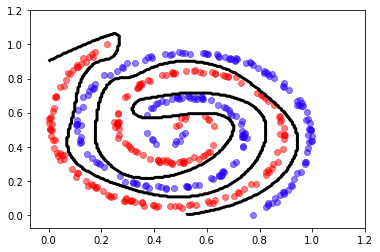

In [253]:
reload(mlutils)
def predict(Xpred):
    preds = model.predict(transform_X(Xpred))
    return (preds[:,0]>preds[:,1]).astype(int)

mlutils.plot_2Ddata_with_boundary(predict, X,y)